## GLOBAL POWER PLANT DATABASE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pp = pd.read_csv('global_power_plant.csv')
pd.options.display.max_columns=None

In [3]:
pp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### In given dataset we have 907 rows and 27 columns.

##### About the columns

##### country -  It represents the country code.

##### name - Name of the power plants.

##### gppd_idnr - Identifier code of a power plant.

##### capacity_mw -  Electrical generating capacity of power plant.

##### latitude - This column shows the latitude of a power plant.

##### longitude - This column shows the longitude of power plant.

##### primary_fuel - Energy source used in primary electricity generation.

##### commissioning_year - This column shows the year of plant operation.

##### owner - This column shows the majority of shareholder of power plant.

##### source - Source of data.

##### url - This column shows the link of web document.

##### geolocation_source - Geological information of plant.

##### generation_data_source - Reported generation information.

##### estimated_generation_gwh - Estimated generation electricity in gigawatt.

In [4]:
pp.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [5]:
pp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

##### Power plant dataset have maximum null values in multiple columns.

In [6]:
l = ['country_long','other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013',
     'generation_gwh_2019','estimated_generation_gwh','geolocation_source','owner']

pp.drop(l,axis=1,inplace=True)

In [7]:
pp.columns

Index(['country', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'source', 'url',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

### Filling NaN values

In [8]:
pp['latitude'].fillna(pp['latitude'].mean(),inplace=True)
pp['longitude'].fillna(pp['longitude'].mean(),inplace=True)
pp['generation_gwh_2014'].fillna(pp['generation_gwh_2014'].mean(),inplace=True)
pp['generation_gwh_2015'].fillna(pp['generation_gwh_2015'].mean(),inplace=True)
pp['generation_gwh_2016'].fillna(pp['generation_gwh_2016'].mean(),inplace=True)
pp['generation_gwh_2017'].fillna(pp['generation_gwh_2017'].mean(),inplace=True)
pp['generation_gwh_2018'].fillna(pp['generation_gwh_2018'].mean(),inplace=True)
pp['commissioning_year'].fillna(pp['commissioning_year'].mean(),inplace=True)
pp['year_of_capacity_data'].fillna(pp['year_of_capacity_data'].mean(),inplace=True)

In [9]:
pp['generation_data_source'].fillna(pp['generation_data_source'].mode()[0],inplace=True)

In [10]:
pp

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,http://www.ultratechcement.com/,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,1997.091082,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.000000,Central Electricity Authority,http://www.cea.nic.in/,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.000000,Central Electricity Authority,http://www.cea.nic.in/,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.000000,Central Electricity Authority,http://www.cea.nic.in/,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,1997.091082,Karnataka Power Corporation Limited,http://karnatakapower.com,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,1997.091082,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,1997.091082,Hindustan Zinc ltd,http://www.hzlindia.com/,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority


##### We fill all the NaN values in the dataset.

In [11]:
pp.isnull().sum()

country                   0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
url                       0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

##### Now we dont have ant null values in dataset.

In [12]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   name                    907 non-null    object 
 2   gppd_idnr               907 non-null    object 
 3   capacity_mw             907 non-null    float64
 4   latitude                907 non-null    float64
 5   longitude               907 non-null    float64
 6   primary_fuel            907 non-null    object 
 7   commissioning_year      907 non-null    float64
 8   source                  907 non-null    object 
 9   url                     907 non-null    object 
 10  year_of_capacity_data   907 non-null    float64
 11  generation_gwh_2014     907 non-null    float64
 12  generation_gwh_2015     907 non-null    float64
 13  generation_gwh_2016     907 non-null    float64
 14  generation_gwh_2017     907 non-null    fl

### Data Analysis and Visualization

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

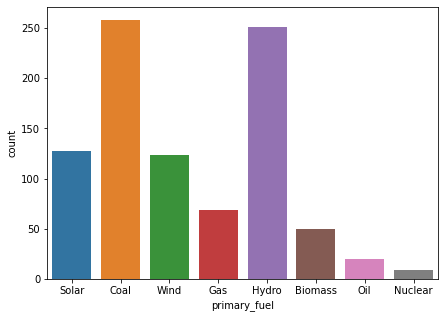

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'primary_fuel',data=pp)

##### From above plot we can see that Coal is more used as a primary fuel than the others.

<AxesSubplot:xlabel='country', ylabel='count'>

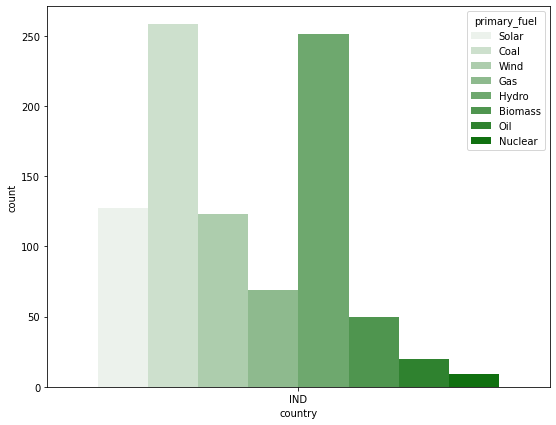

In [14]:
plt.figure(figsize=(9,7))
sns.countplot(x = 'country',hue='primary_fuel',data=pp,color='Green')

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

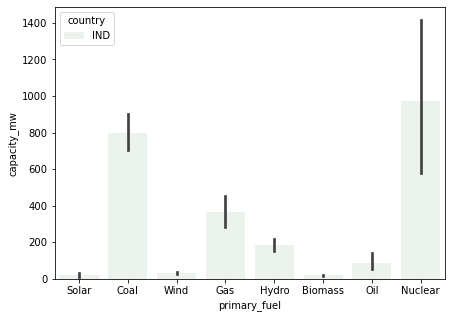

In [15]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'primary_fuel',y='capacity_mw',hue = 'country',data=pp,color='Green')

##### Nuclear fuel is higher capacity than the other primary fuel.

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

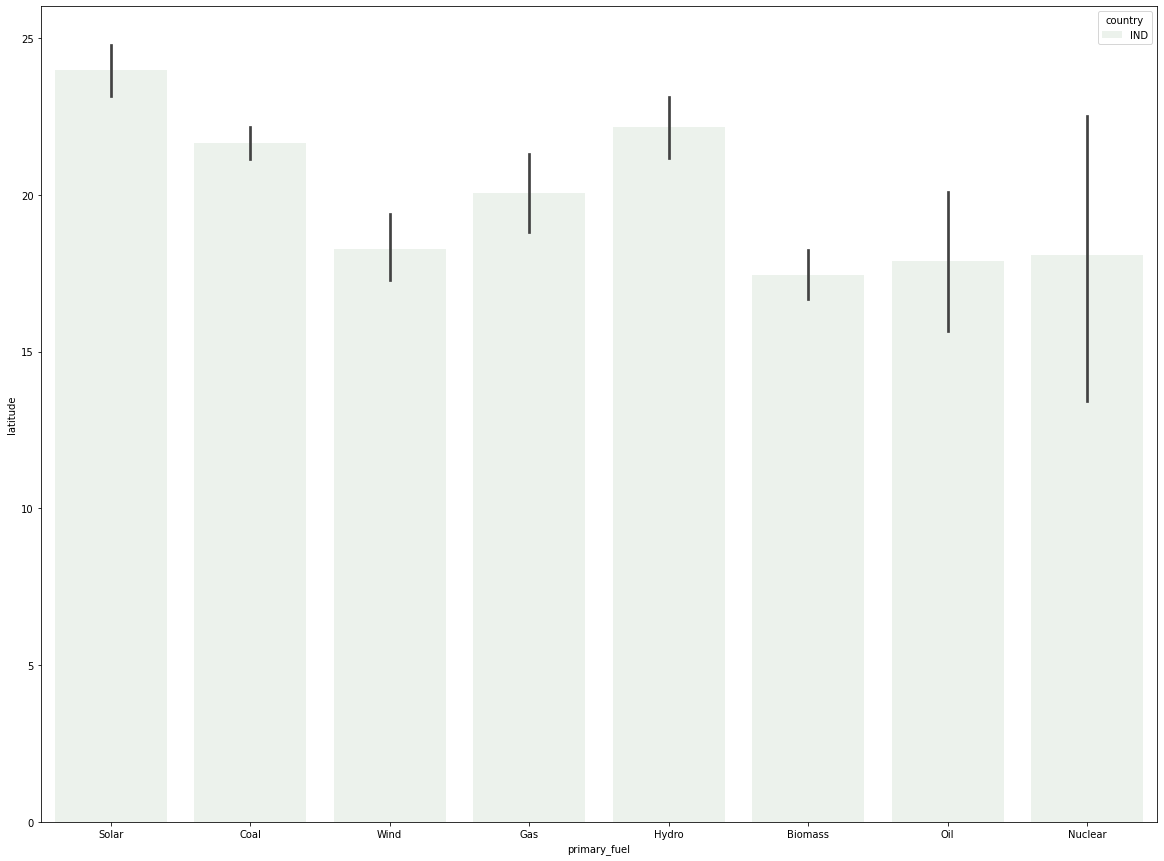

In [16]:
plt.figure(figsize=(20,15))
sns.barplot(x = 'primary_fuel',y = 'latitude',hue='country',data=pp,color='Green')

In [17]:
pp.drop(['country','name','source','url','year_of_capacity_data'],axis=1,inplace=True)

In [18]:
pp

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,WRI1020239,2.5,28.1839,73.2407,Solar,2011.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,WRI1019881,98.0,24.7663,74.6090,Coal,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,WRI1026669,39.2,21.9038,69.3732,Wind,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND0000001,135.0,23.8712,91.3602,Gas,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND0000002,1800.0,21.9603,82.4091,Coal,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,2016.000000,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,WRI1026222,3.0,12.8932,78.1654,Solar,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
904,WRI1026776,25.5,15.2758,75.5811,Wind,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
905,WRI1019901,80.0,24.3500,73.7477,Coal,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority


### Description

In [19]:
pp.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


##### The description of dataaset shows the Count,Standard deviation,Mean,Maximum value,Minimum value of each column.

<AxesSubplot:>

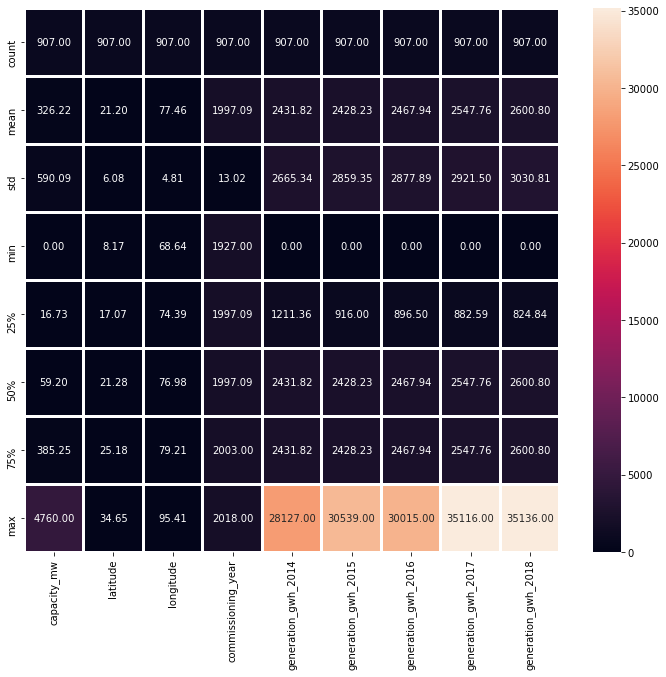

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(pp.describe(),annot=True,fmt='.2f',linewidths=2)

### Outcome of Description

##### Description of Power Plant dataset helps us to clean the data.

capacity_mw - 1.Mean = 326.22, 2.Std = 590.09, 3.Min = 0, Max = 4760

latitude - 1.Mean = 21.20, 2.Std = 6.08, 3.Min = 8.17, Max = 34.65

longitude - 1.Mean = 77.46, 2.Std = 4.81, 3.Min = 68.64, Max = 95.41

commissioning_year - 1.Mean = 1997.09, 2.Std = 13.02, 3.Min = 1927, Max = 2018

year_of_capacity_data - 1.Mean = 2019, 2.Std = 0, 3.Min = 2019, Max = 2019

generation_gwh_2014 - 1.Mean = 2431.82, 2.Std = 266.34, 3.Min = 0, Max = 28127

generation_gwh_2015 - 1.Mean = 2428.23, 2.Std = 2859.35, 3.Min = 0, Max = 30539

generation_gwh_2016 - 1.Mean = 2467.94, 2.Std = 2877.89, 3.Min = 0, Max = 30015

generation_gwh_2017 - 1.Mean = 2547.76, 2.Std = 2921.50, 3.Min = 0, Max = 35116

generation_gwh_2018 - 1.Mean = 2600.80, 2.Std = 3030.81, 3.Min = 0, Max = 35136


### Correlation

In [21]:
pp.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.274292,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,0.102069,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,0.092331,0.011472,0.018818,0.039209,0.039675,0.037780
commissioning_year,0.274292,0.102069,0.092331,1.000000,0.133051,0.147338,0.170644,0.170863,0.174377
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,0.174377,0.884956,0.923461,0.957159,0.982689,1.000000


<AxesSubplot:>

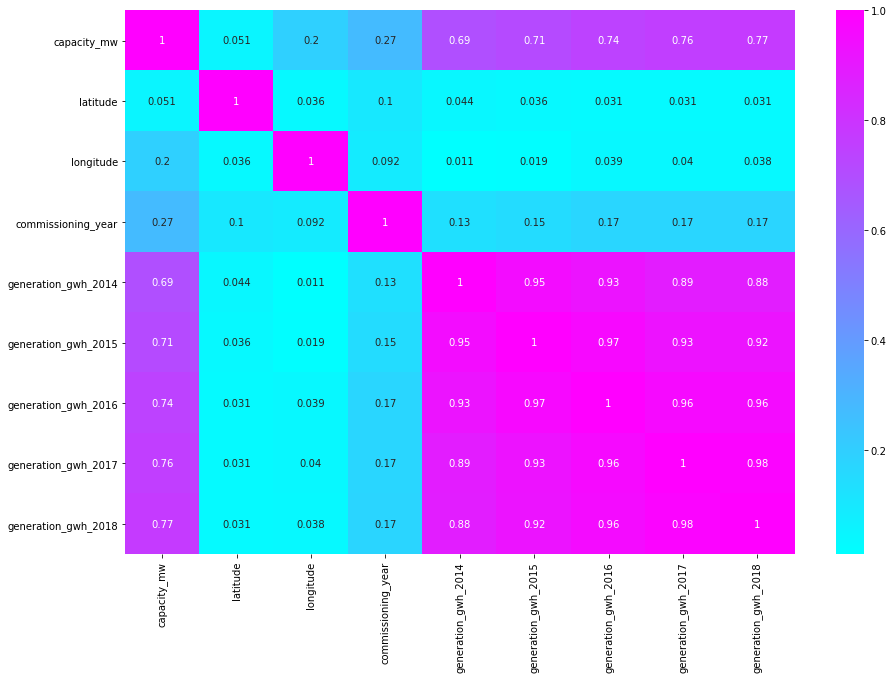

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(pp.corr(),annot=True,cmap='cool')

##### As we seen from above plot all the columns are positively correlated with each other.
##### Capacity_mw is highly correlated with generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018. All the generation_gwh columns are highly correlated with each other.

In [23]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gppd_idnr               907 non-null    object 
 1   capacity_mw             907 non-null    float64
 2   latitude                907 non-null    float64
 3   longitude               907 non-null    float64
 4   primary_fuel            907 non-null    object 
 5   commissioning_year      907 non-null    float64
 6   generation_gwh_2014     907 non-null    float64
 7   generation_gwh_2015     907 non-null    float64
 8   generation_gwh_2016     907 non-null    float64
 9   generation_gwh_2017     907 non-null    float64
 10  generation_gwh_2018     907 non-null    float64
 11  generation_data_source  907 non-null    object 
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


##### Power plant dataset has no null value.

### Data Cleaning

In [24]:
pp.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

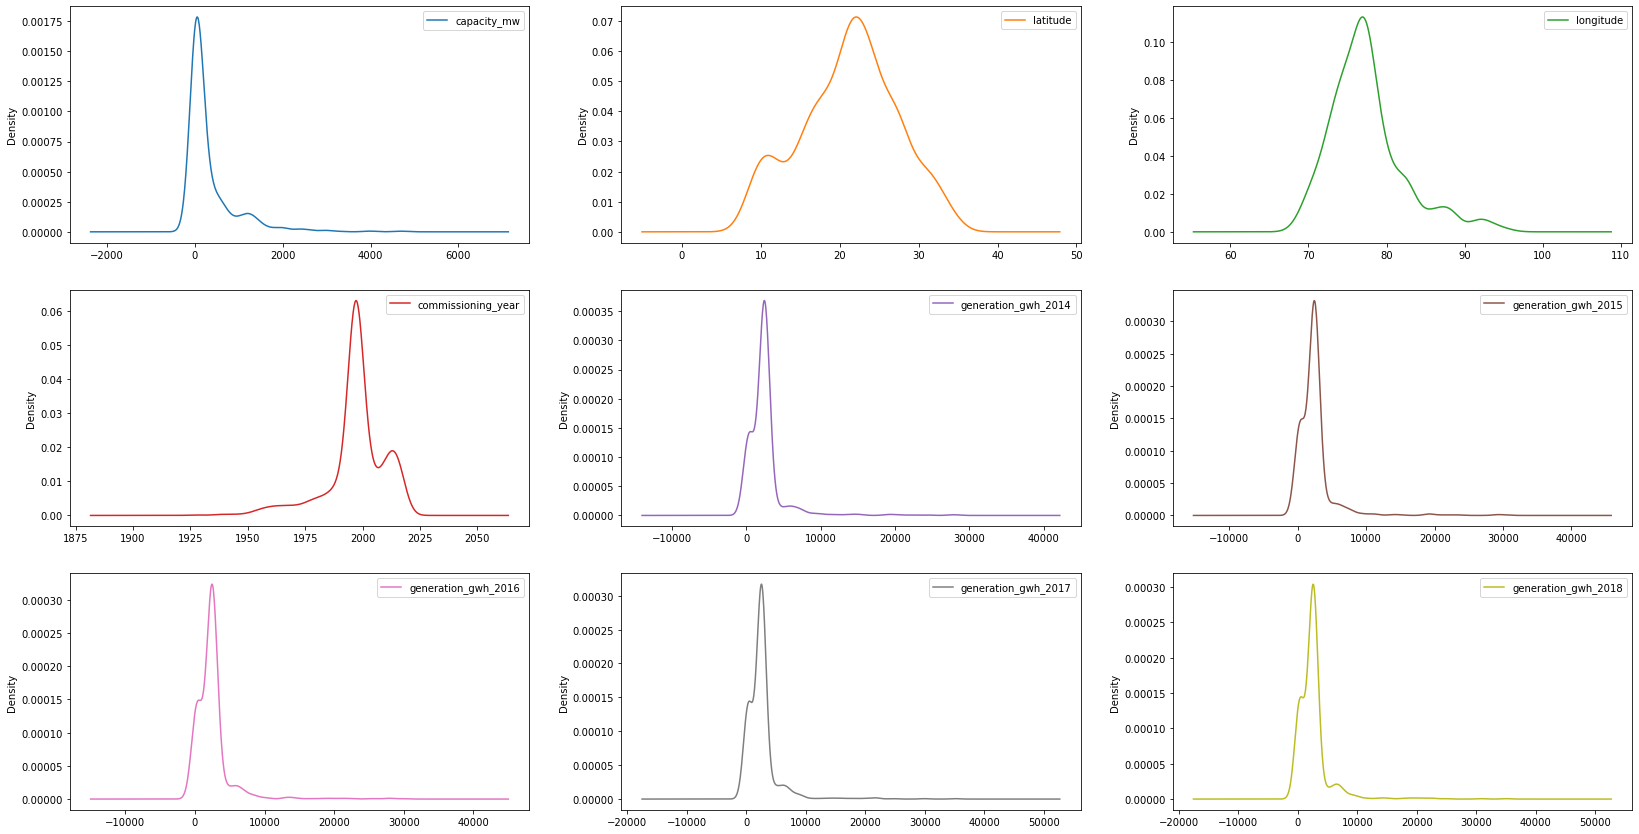

In [25]:
pp.plot(kind = 'density',subplots = True, layout = (4,3),figsize=(28,20),sharex=False)
plt.show()

In [26]:
pp.skew().sort_values(ascending = False)

generation_gwh_2015    5.364134
generation_gwh_2017    5.110952
generation_gwh_2016    5.068427
generation_gwh_2014    5.035446
generation_gwh_2018    4.937907
capacity_mw            3.123576
longitude              1.141881
latitude              -0.149698
commissioning_year    -1.399359
dtype: float64

### Data Conversion

In [27]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()

In [28]:
for i in pp.columns:
    if pp[i].dtypes == object:
        pp[i] = onc.fit_transform(pp[i].values.reshape(-1,1))

In [29]:
pp

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,657.0,2.5,28.1839,73.2407,6.0,2011.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
1,519.0,98.0,24.7663,74.6090,1.0,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
2,853.0,39.2,21.9038,69.3732,7.0,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
3,0.0,135.0,23.8712,91.3602,2.0,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,1.0,1800.0,21.9603,82.4091,1.0,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,491.0,1600.0,16.2949,77.3568,1.0,2016.000000,2431.823590,0.994875,233.596650,865.400000,686.500000,0.0
903,822.0,3.0,12.8932,78.1654,6.0,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
904,891.0,25.5,15.2758,75.5811,7.0,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
905,539.0,80.0,24.3500,73.7477,1.0,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0


In [30]:
pp.drop(['generation_data_source'],axis=1,inplace=True)

### Checking Outliers

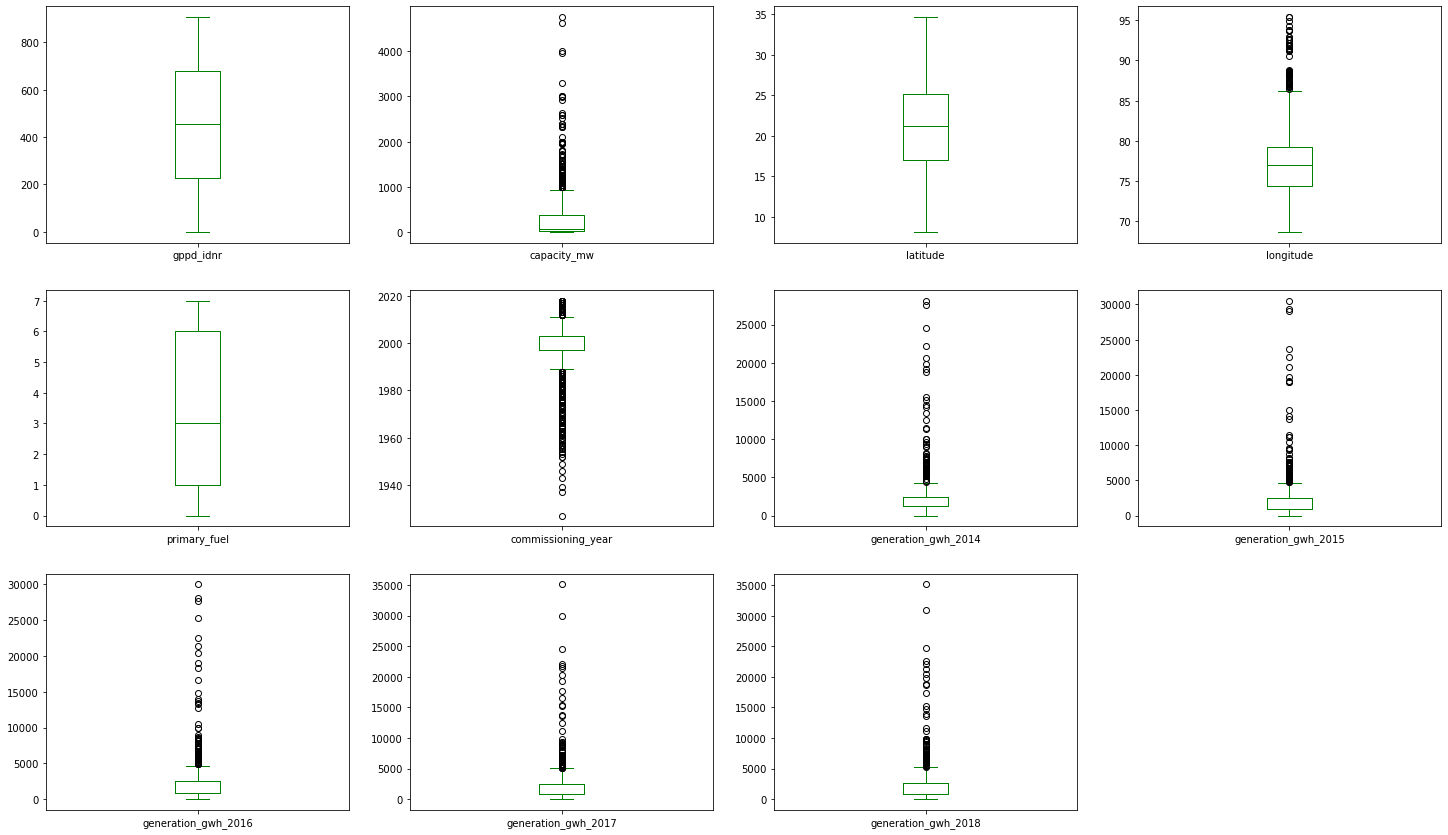

In [31]:
pp.plot(kind = 'box',subplots=True,layout=(4,4),figsize=(25,20),sharex=True,color='g')
plt.show()

##### We can see outliers present in :

Capacity_mw

Longitude	

Commissioning_year	

Generation_gwh_2014	

Generation_gwh_2015	

Generation_gwh_2016	

Generation_gwh_2017	

Generation_gwh_2018

### Removing Outliers

#### Z Score Technique

In [32]:
from scipy.stats import zscore

z = np.abs(zscore(pp))
z.shape

(907, 11)

In [33]:
pp = pp[(z<3).all(axis=1)]
pp.shape

(849, 11)

In [34]:
[(np.abs(zscore(pp))<3).all()]

[False]

### Percentage Data Loss

In [35]:
percentage_loss = (907-849)/907*100
percentage_loss

6.39470782800441

### Splitting the dataset in ppx and ppy

In [36]:
ppx = pp.drop('primary_fuel',axis=1)
ppx.shape

(849, 10)

In [37]:
ppy = pp['primary_fuel']
ppy.shape

(849,)

<function matplotlib.pyplot.show(close=None, block=None)>

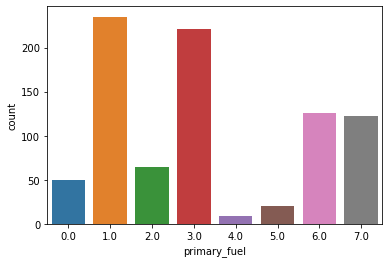

In [38]:
sns.countplot(ppy)
plt.show

##### We can see that dataset is imbalanced.

### SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x,y = sm.fit_resample(ppx,ppy)

In [40]:
x.shape

(1880, 10)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

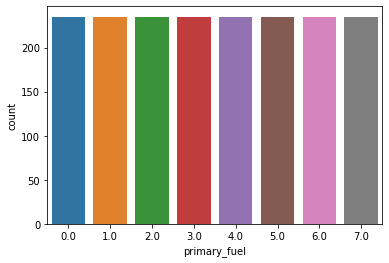

In [41]:
sns.countplot(y)

##### Dataset is balanced now.

### Removing Skewness

In [42]:
x.skew().sort_values(ascending=False)

capacity_mw            1.998919
generation_gwh_2015    1.569746
generation_gwh_2014    1.460289
generation_gwh_2016    1.377785
generation_gwh_2018    1.316558
longitude              1.246617
generation_gwh_2017    1.193098
latitude               0.049538
gppd_idnr             -0.122434
commissioning_year    -0.865815
dtype: float64

In [43]:
from sklearn.preprocessing import power_transform

x1 = power_transform(x)

In [44]:
x = pd.DataFrame(x1,columns=x.columns)
x

,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.729012,-1.809155,1.441329,-0.945277,1.681314,0.301791,0.351119,0.348586,0.281018,0.377556
1,0.215662,0.193468,0.864361,-0.433187,-0.124700,0.301791,0.351119,0.348586,0.281018,0.377556
2,1.424887,-0.318428,0.372870,-2.790468,-0.124700,0.301791,0.351119,0.348586,0.281018,0.377556
3,-2.204517,0.369134,0.711531,2.750071,0.718559,-1.005532,-0.672567,-0.606345,-0.970128,-0.825851
4,-2.193083,1.712354,0.382651,1.570080,2.285534,0.622901,1.769726,1.751109,1.484557,1.935860
...,...,...,...,...,...,...,...,...,...,...
1875,1.412440,-0.176855,-0.112651,-0.317603,-0.124700,0.301791,0.351119,0.348586,0.281018,0.377556
1876,1.368759,-1.039727,-1.414916,0.332161,-0.124700,0.301791,0.351119,0.348586,0.281018,0.377556
1877,0.794336,0.184531,-0.510402,-0.569105,-0.124700,0.301791,0.351119,0.348586,0.281018,0.377556
1878,1.495650,-1.377907,-1.717526,0.468923,-0.124700,0.301791,0.351119,0.348586,0.281018,0.377556


In [45]:
x.skew()

gppd_idnr             -0.285109
capacity_mw            0.023360
latitude              -0.042599
longitude             -0.039620
commissioning_year     0.097517
generation_gwh_2014   -0.352692
generation_gwh_2015   -0.368877
generation_gwh_2016   -0.473629
generation_gwh_2017   -0.408210
generation_gwh_2018   -0.525522
dtype: float64

##### As we seen that all the values are within the threshold.

### Checking VIF

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF_Values'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values(by='VIF_Values',ascending = False))

In [48]:
calculate_vif(x)

,Features,VIF_Values
7,generation_gwh_2016,19.094564
9,generation_gwh_2018,13.804635
6,generation_gwh_2015,11.887845
5,generation_gwh_2014,6.600531
8,generation_gwh_2017,5.309936
0,gppd_idnr,2.046749
1,capacity_mw,1.784755
3,longitude,1.298238
4,commissioning_year,1.122433
2,latitude,1.115698


In [49]:
x

,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.729012,-1.809155,1.441329,-0.945277,1.681314,0.301791,0.351119,0.348586,0.281018,0.377556
1,0.215662,0.193468,0.864361,-0.433187,-0.124700,0.301791,0.351119,0.348586,0.281018,0.377556
2,1.424887,-0.318428,0.372870,-2.790468,-0.124700,0.301791,0.351119,0.348586,0.281018,0.377556
3,-2.204517,0.369134,0.711531,2.750071,0.718559,-1.005532,-0.672567,-0.606345,-0.970128,-0.825851
4,-2.193083,1.712354,0.382651,1.570080,2.285534,0.622901,1.769726,1.751109,1.484557,1.935860
...,...,...,...,...,...,...,...,...,...,...
1875,1.412440,-0.176855,-0.112651,-0.317603,-0.124700,0.301791,0.351119,0.348586,0.281018,0.377556
1876,1.368759,-1.039727,-1.414916,0.332161,-0.124700,0.301791,0.351119,0.348586,0.281018,0.377556
1877,0.794336,0.184531,-0.510402,-0.569105,-0.124700,0.301791,0.351119,0.348586,0.281018,0.377556
1878,1.495650,-1.377907,-1.717526,0.468923,-0.124700,0.301791,0.351119,0.348586,0.281018,0.377556


In [50]:
x.shape

(1880, 10)

In [51]:
calculate_vif(x)

,Features,VIF_Values
7,generation_gwh_2016,19.094564
9,generation_gwh_2018,13.804635
6,generation_gwh_2015,11.887845
5,generation_gwh_2014,6.600531
8,generation_gwh_2017,5.309936
0,gppd_idnr,2.046749
1,capacity_mw,1.784755
3,longitude,1.298238
4,commissioning_year,1.122433
2,latitude,1.115698


### Scaling the Model

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
ppx = sc.fit_transform(x)

In [53]:
x.shape

(1880, 10)

In [54]:
y.shape

(1880,)

## Classification for Primary Fuel

### Training Process

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [56]:
lr = LogisticRegression()
lr

LogisticRegression()

### Best Random State

In [57]:
maxAccu = 0
maxRs = 0

for i in (1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best Accuracy is',maxAccu,'on Random State',maxRs)

Best Accuracy is 0.7021276595744681 on Random State 1


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=1)

In [59]:
x_train.shape

(1410, 10)

In [60]:
x_test.shape

(470, 10)

In [61]:
y_train.shape

(1410,)

In [62]:
y_test.shape

(470,)

### Model Testing

In [63]:
def Model(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print('Accuracy',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    scr1 = cross_val_score(model,x,y,cv = 5)
    print('Cross validation score :',scr1.mean())

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
Model(lr)

Accuracy 0.7021276595744681
[[62  0  0  0  0  0  0  0]
 [ 5 27 10  7 10  2  0  0]
 [ 2 10 20  5  2  8  0  0]
 [ 2 10 12 34  1  3  0  0]
 [ 0  2  0  5 52  0  0  1]
 [ 2  1 13  3  0 44  0  1]
 [ 0  0  0  0  0  0 46 10]
 [ 3  2  0  0  0  0  8 45]]
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        62
         1.0       0.52      0.44      0.48        61
         2.0       0.36      0.43      0.39        47
         3.0       0.63      0.55      0.59        62
         4.0       0.80      0.87      0.83        60
         5.0       0.77      0.69      0.73        64
         6.0       0.85      0.82      0.84        56
         7.0       0.79      0.78      0.78        58

    accuracy                           0.70       470
   macro avg       0.69      0.70      0.69       470
weighted avg       0.70      0.70      0.70       470

Cross validation score : 0.6856382978723404


### Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
Model(rf)

Accuracy 0.9127659574468086
[[62  0  0  0  0  0  0  0]
 [ 3 40  8  3  5  2  0  0]
 [ 2  2 39  0  1  3  0  0]
 [ 0  2  6 52  2  0  0  0]
 [ 0  0  0  0 60  0  0  0]
 [ 0  1  1  0  0 62  0  0]
 [ 0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0 58]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        62
         1.0       0.89      0.66      0.75        61
         2.0       0.72      0.83      0.77        47
         3.0       0.95      0.84      0.89        62
         4.0       0.88      1.00      0.94        60
         5.0       0.93      0.97      0.95        64
         6.0       1.00      1.00      1.00        56
         7.0       1.00      1.00      1.00        58

    accuracy                           0.91       470
   macro avg       0.91      0.91      0.91       470
weighted avg       0.92      0.91      0.91       470

Cross validation score : 0.9164893617021278


### Service Vector Classifier

In [66]:
from sklearn.svm import SVC

sv = SVC()
Model(sv)

Accuracy 0.8106382978723404
[[62  0  0  0  0  0  0  0]
 [ 4 36 11  2  6  2  0  0]
 [ 2  7 30  0  1  7  0  0]
 [ 1  5 14 40  1  1  0  0]
 [ 0  0  0  0 60  0  0  0]
 [ 0  1  0  1  0 62  0  0]
 [ 0  0  0  0  0  0 45 11]
 [ 1  2  0  0  0  3  6 46]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        62
         1.0       0.71      0.59      0.64        61
         2.0       0.55      0.64      0.59        47
         3.0       0.93      0.65      0.76        62
         4.0       0.88      1.00      0.94        60
         5.0       0.83      0.97      0.89        64
         6.0       0.88      0.80      0.84        56
         7.0       0.81      0.79      0.80        58

    accuracy                           0.81       470
   macro avg       0.81      0.80      0.80       470
weighted avg       0.82      0.81      0.81       470

Cross validation score : 0.8090425531914894


### Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
Model(dt)

Accuracy 0.8702127659574468
[[59  0  2  0  0  1  0  0]
 [ 1 41  9  1  7  2  0  0]
 [ 2  7 33  1  0  4  0  0]
 [ 1  5  7 45  1  3  0  0]
 [ 0  1  0  0 59  0  0  0]
 [ 0  1  4  1  0 58  0  0]
 [ 0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0 58]]
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94        62
         1.0       0.75      0.67      0.71        61
         2.0       0.60      0.70      0.65        47
         3.0       0.94      0.73      0.82        62
         4.0       0.88      0.98      0.93        60
         5.0       0.85      0.91      0.88        64
         6.0       1.00      1.00      1.00        56
         7.0       1.00      1.00      1.00        58

    accuracy                           0.87       470
   macro avg       0.87      0.87      0.87       470
weighted avg       0.88      0.87      0.87       470

Cross validation score : 0.8686170212765958


### KNeighbours Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
Model(kn)

Accuracy 0.8425531914893617
[[62  0  0  0  0  0  0  0]
 [ 4 39  7  2  6  3  0  0]
 [ 2  4 37  0  1  3  0  0]
 [ 1  5 16 37  2  1  0  0]
 [ 0  1  0  0 59  0  0  0]
 [ 0  0  0  0  0 64  0  0]
 [ 1  1  0  0  0  0 48  6]
 [ 0  0  3  0  0  0  5 50]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        62
         1.0       0.78      0.64      0.70        61
         2.0       0.59      0.79      0.67        47
         3.0       0.95      0.60      0.73        62
         4.0       0.87      0.98      0.92        60
         5.0       0.90      1.00      0.95        64
         6.0       0.91      0.86      0.88        56
         7.0       0.89      0.86      0.88        58

    accuracy                           0.84       470
   macro avg       0.85      0.84      0.83       470
weighted avg       0.85      0.84      0.84       470

Cross validation score : 0.8319148936170212


### Extra Tree Classifier

In [69]:
from sklearn.tree import ExtraTreeClassifier

et = ExtraTreeClassifier()
Model(et)

Accuracy 0.825531914893617
[[58  2  1  0  0  0  0  1]
 [ 6 29 11  1  9  4  0  1]
 [ 1  4 34  3  1  4  0  0]
 [ 0  5  9 46  0  2  0  0]
 [ 0  0  0  0 60  0  0  0]
 [ 0  0  3  1  0 60  0  0]
 [ 2  0  0  0  0  0 48  6]
 [ 0  2  0  0  0  0  3 53]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90        62
         1.0       0.69      0.48      0.56        61
         2.0       0.59      0.72      0.65        47
         3.0       0.90      0.74      0.81        62
         4.0       0.86      1.00      0.92        60
         5.0       0.86      0.94      0.90        64
         6.0       0.94      0.86      0.90        56
         7.0       0.87      0.91      0.89        58

    accuracy                           0.83       470
   macro avg       0.82      0.82      0.82       470
weighted avg       0.83      0.83      0.82       470

Cross validation score : 0.8164893617021278


##### Accuracy score for Random Forest Classifier is higher than the other models. Now we doing Hyper Parameter Tuning and after that select the final Model.

### Hyper Parameter Tuning

#### Random Forest Classifier

In [70]:
RandomForestClassifier()

RandomForestClassifier()

In [71]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : [100],
              'criterion' : ["gini", "entropy"],
              'max_depth' : [2,4,6,8,10],
              'max_features' : ["auto", "sqrt", "log2"],
              'class_weight' : ["balanced", "balanced_subsample"]}

In [72]:
GSC = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GSC.fit(x_train,y_train)
GSC.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [73]:
GSC_pred = GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.9085106382978724

### Decision Tree Classifier

In [74]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [75]:
parameters = {'criterion' : ["gini", "entropy"],
             'splitter' : ["best", "random"],
             'max_depth' : [2,4,6,8,10],
             'max_features' :["auto", "sqrt", "log2"]}

In [76]:
GSC = GridSearchCV(DecisionTreeClassifier(),parameters,cv=5,scoring='accuracy')
GSC.fit(x_train,y_train)
GSC.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'splitter': 'best'}

In [77]:
GSC_pred = GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.8127659574468085

#### KNeighbours Classifier

In [78]:
KNeighborsClassifier()

KNeighborsClassifier()

In [79]:
parameters = {'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : [30]}

In [80]:
GSC = GridSearchCV(KNeighborsClassifier(),parameters,cv=5,scoring='accuracy')
GSC.fit(x_train,y_train)
GSC.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'weights': 'distance'}

In [81]:
GSC_pred = GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.8659574468085106

##### As we seen after doing hyper parameter tuning only for KNeighbours Classifier accuracy score is increased, but the Accuracy score for Random Forest Classifier is highest than other Models without Hyper parameter Tuning.

##### So we choose Random Forest Classifier as our Final Model.

## Regression for Capacity_mw

In [82]:
pp

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657.0,2.5,28.1839,73.2407,6.0,2011.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519.0,98.0,24.7663,74.6090,1.0,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853.0,39.2,21.9038,69.3732,7.0,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0.0,135.0,23.8712,91.3602,2.0,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128
4,1.0,1800.0,21.9603,82.4091,1.0,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,491.0,1600.0,16.2949,77.3568,1.0,2016.000000,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822.0,3.0,12.8932,78.1654,6.0,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891.0,25.5,15.2758,75.5811,7.0,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539.0,80.0,24.3500,73.7477,1.0,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


### Splitting the data in x and y

In [83]:
x = pp.drop('capacity_mw',axis=1)

In [84]:
x.shape

(849, 10)

In [85]:
y = pp['capacity_mw']

In [86]:
y.shape

(849,)

### Skewness

In [87]:
x.skew().sort_values(ascending=False)

generation_gwh_2014    1.526648
generation_gwh_2016    1.413144
generation_gwh_2015    1.389889
generation_gwh_2018    1.315481
generation_gwh_2017    1.278735
longitude              0.921980
primary_fuel           0.408694
gppd_idnr             -0.079104
latitude              -0.109823
commissioning_year    -0.845654
dtype: float64

##### Lets set the threshold at 0.5.

### Removing Skewness

In [88]:
from sklearn.preprocessing import power_transform

x1 = power_transform(x)

In [89]:
x = pd.DataFrame(x1,columns=x.columns)
x

,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.743646,1.164277,-0.928072,1.131644,1.292854,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.281373,0.595264,-0.509209,-1.001767,-0.181973,0.327200,0.356092,0.359399,0.360086,0.375133
2,1.359484,0.122311,-2.363978,1.404554,-0.181973,0.327200,0.356092,0.359399,0.360086,0.375133
3,-2.115014,0.446997,2.442106,-0.388523,0.501339,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,-2.099361,0.131611,1.253969,-1.001767,1.795252,0.665917,1.898269,1.935543,1.564919,2.122435
...,...,...,...,...,...,...,...,...,...,...
844,0.183910,-0.793140,0.219861,-1.001767,1.926982,0.327200,-2.096477,-1.420156,-0.721222,-0.867297
845,1.264726,-1.339555,0.409525,1.131644,-0.181973,0.327200,0.356092,0.359399,0.360086,0.375133
846,1.474441,-0.957619,-0.235273,1.404554,-0.181973,0.327200,0.356092,0.359399,0.360086,0.375133
847,0.350163,0.526266,-0.768095,-1.001767,-0.181973,0.327200,0.356092,0.359399,0.360086,0.375133


In [90]:
x.skew()

gppd_idnr             -0.324126
latitude              -0.069694
longitude              0.000035
primary_fuel          -0.059648
commissioning_year     0.031733
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

##### As we can see that all the values are within the threshold.

### VIF

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [92]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF_Values'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values(by = 'VIF_Values',ascending = False))

In [93]:
calculate_vif(x.columns)

,Features,VIF_Values
9,generation_gwh_2018,12.345724
7,generation_gwh_2016,11.899260
8,generation_gwh_2017,11.614500
6,generation_gwh_2015,8.046135
5,generation_gwh_2014,4.224755
0,gppd_idnr,1.625067
3,primary_fuel,1.457257
2,longitude,1.299745
4,commissioning_year,1.114328
1,latitude,1.060939


In [94]:
x.drop(['generation_gwh_2018','generation_gwh_2016'],axis=1,inplace=True)

In [95]:
x

,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017
0,0.743646,1.164277,-0.928072,1.131644,1.292854,0.327200,0.356092,0.360086
1,0.281373,0.595264,-0.509209,-1.001767,-0.181973,0.327200,0.356092,0.360086
2,1.359484,0.122311,-2.363978,1.404554,-0.181973,0.327200,0.356092,0.360086
3,-2.115014,0.446997,2.442106,-0.388523,0.501339,-1.046002,-0.731478,-0.905238
4,-2.099361,0.131611,1.253969,-1.001767,1.795252,0.665917,1.898269,1.564919
...,...,...,...,...,...,...,...,...
844,0.183910,-0.793140,0.219861,-1.001767,1.926982,0.327200,-2.096477,-0.721222
845,1.264726,-1.339555,0.409525,1.131644,-0.181973,0.327200,0.356092,0.360086
846,1.474441,-0.957619,-0.235273,1.404554,-0.181973,0.327200,0.356092,0.360086
847,0.350163,0.526266,-0.768095,-1.001767,-0.181973,0.327200,0.356092,0.360086


In [96]:
calculate_vif(x)

,Features,VIF_Values
6,generation_gwh_2015,5.202544
5,generation_gwh_2014,4.190771
7,generation_gwh_2017,2.945551
0,gppd_idnr,1.623521
3,primary_fuel,1.457255
2,longitude,1.293362
4,commissioning_year,1.098146
1,latitude,1.059556


##### Let's keep the threshold on 10, we can see that all the values are within the threshold.

### Scaling the Model

In [97]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
ppx = sc.fit_transform(x)

In [98]:
x.shape

(849, 8)

In [99]:
y.shape

(849,)

### Training Process

In [100]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
LR = LinearRegression()

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Random State

In [101]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=i)
    LR.fit(x_train,y_train)
    pred_tr = LR.predict(x_train)
    pred_ts = LR.predict(x_test)
    print(f"At random state {i},the training accuracy is : {r2_score(y_train,pred_tr)}")
    print(f"At random state {i},the testing accuracy is : {r2_score(y_test,pred_ts)}")
    print("\n")
    
    
        
    
 

   # At random state 59,the training accuracy is : 0.4891872703698691
   # At random state 59,the testing accuracy is : 0.4867639694119127
    
    

At random state 0,the training accuracy is : 0.4984329650136874
At random state 0,the testing accuracy is : 0.4479309629989281


At random state 1,the training accuracy is : 0.49401082531395146
At random state 1,the testing accuracy is : 0.47578750189694474


At random state 2,the training accuracy is : 0.47206649462603645
At random state 2,the testing accuracy is : 0.5397989548271522


At random state 3,the training accuracy is : 0.47469858919189845
At random state 3,the testing accuracy is : 0.5221479840651087


At random state 4,the training accuracy is : 0.5030184665359124
At random state 4,the testing accuracy is : 0.4413561899646199


At random state 5,the training accuracy is : 0.4732302993050509
At random state 5,the testing accuracy is : 0.5294171369091564


At random state 6,the training accuracy is : 0.4554370823507975
At random state 6,the testing accuracy is : 0.5509190555684453


At random state 7,the training accuracy is : 0.4986460031955696
At random state 7,the testing

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=59)

In [119]:
x_train.shape

(636, 8)

In [120]:
x_test.shape

(213, 8)

In [121]:
y_train.shape

(636,)

In [122]:
y_test.shape

(213,)

In [123]:
LR.fit(x_train,y_train)

LinearRegression()

In [124]:
pred_ts = LR.predict(x_test)

In [125]:
print(r2_score(y_test,pred_ts))

0.4867639694119127


### Model Testing

In [126]:
def train(model,x,y):
    model.fit(x,y)
    pred = model.predict(x)
    cv_score = cross_val_score(model,x,y,scoring='neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    print('Model Report')
    print('MSE',mean_squared_error(y_pred))
    print('CV',cv_score)

##### r2_score for dataset is 49 percent.